# DSAI LAB PROJECT:
### LOAN APPROVAL AND LOAN AMOUNT PREDICTION
---

## Data Cleaning and Exploratory Analysis
### This file focus on exploratory data analysis and analytic visualisation
### we aim to find the variables which will help us predict the loan amount and loan status(i.e approve/reject)

#
## Exploratory Data Analysis

In [121]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [123]:
dataset = pd.read_csv("loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [125]:
dataset[" loan_status"].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

## Analytic Visualisation

#### we try to find the variable which correlate the most with loan status and loan amount using a heatmap

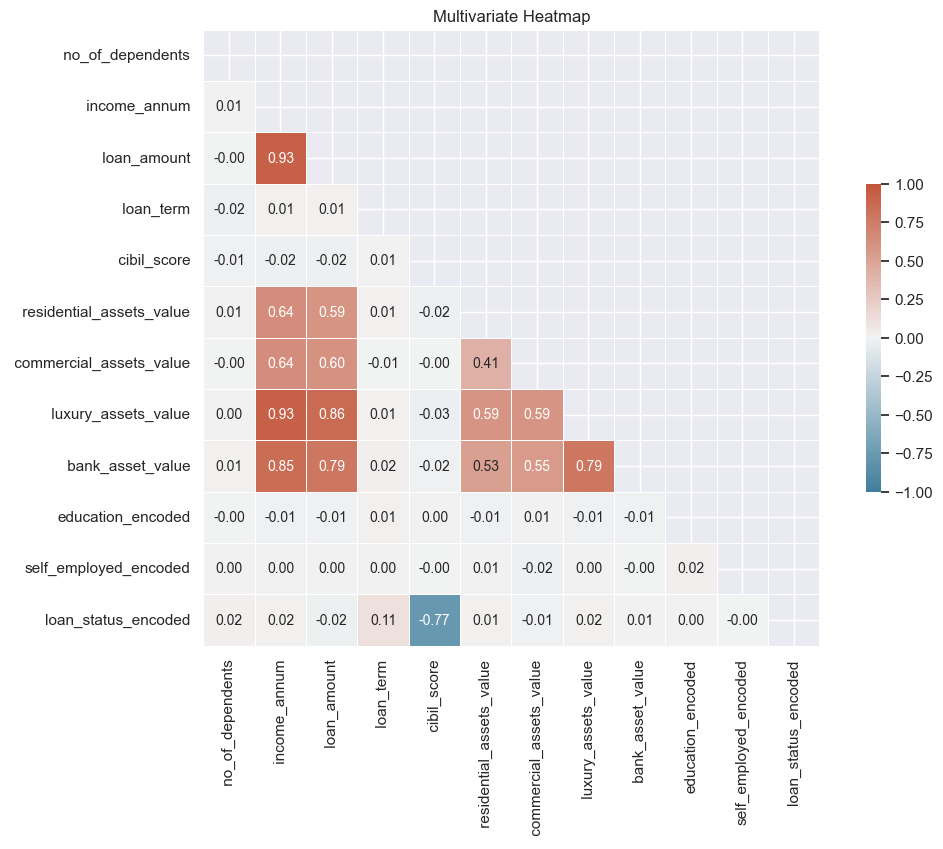

In [126]:
df = dataset.copy()

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df[' education'])
df['self_employed_encoded'] = label_encoder.fit_transform(df[' self_employed'])
df['loan_status_encoded'] = label_encoder.fit_transform(df[' loan_status'])

# Drop non-encoded and non-numeric columns
df_numeric = df.drop(['loan_id', ' education', ' self_employed', ' loan_status'], axis=1)

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10},
            vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Multivariate Heatmap')
plt.show()

### We notice the following:
* loan_amount v income_annum            0.93    ✅
* loan_amount v luxury_assets_value     0.86    ✅
* loan amount v bank_assets_value       0.79    ✅
* loan amount v commercial_assets_value 0.60
* loan amount v residential_assets_value0.59

* loan_status v cibil_score            -0.77    ✅
* loan status v loan_term               0.11

### Variables below have little to no correlation hence can be cleared:
* number of dependents
* self_employed
* loan id

In [127]:
dataset.drop(columns = [" self_employed"," no_of_dependents","loan_id"])

,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,Not Graduate,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,Graduate,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,Graduate,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...
4264,Graduate,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,Not Graduate,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,Not Graduate,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,Not Graduate,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Now we try to visualise the data (analytic visualisation)

#### we expand on the correlation of loan amount against:
* income_annum
* luxury_assets_value
* bank_assets_value
* commercial_assets_value 
* residential_assets_value

### Using a scatter plot since all of them are numerical values

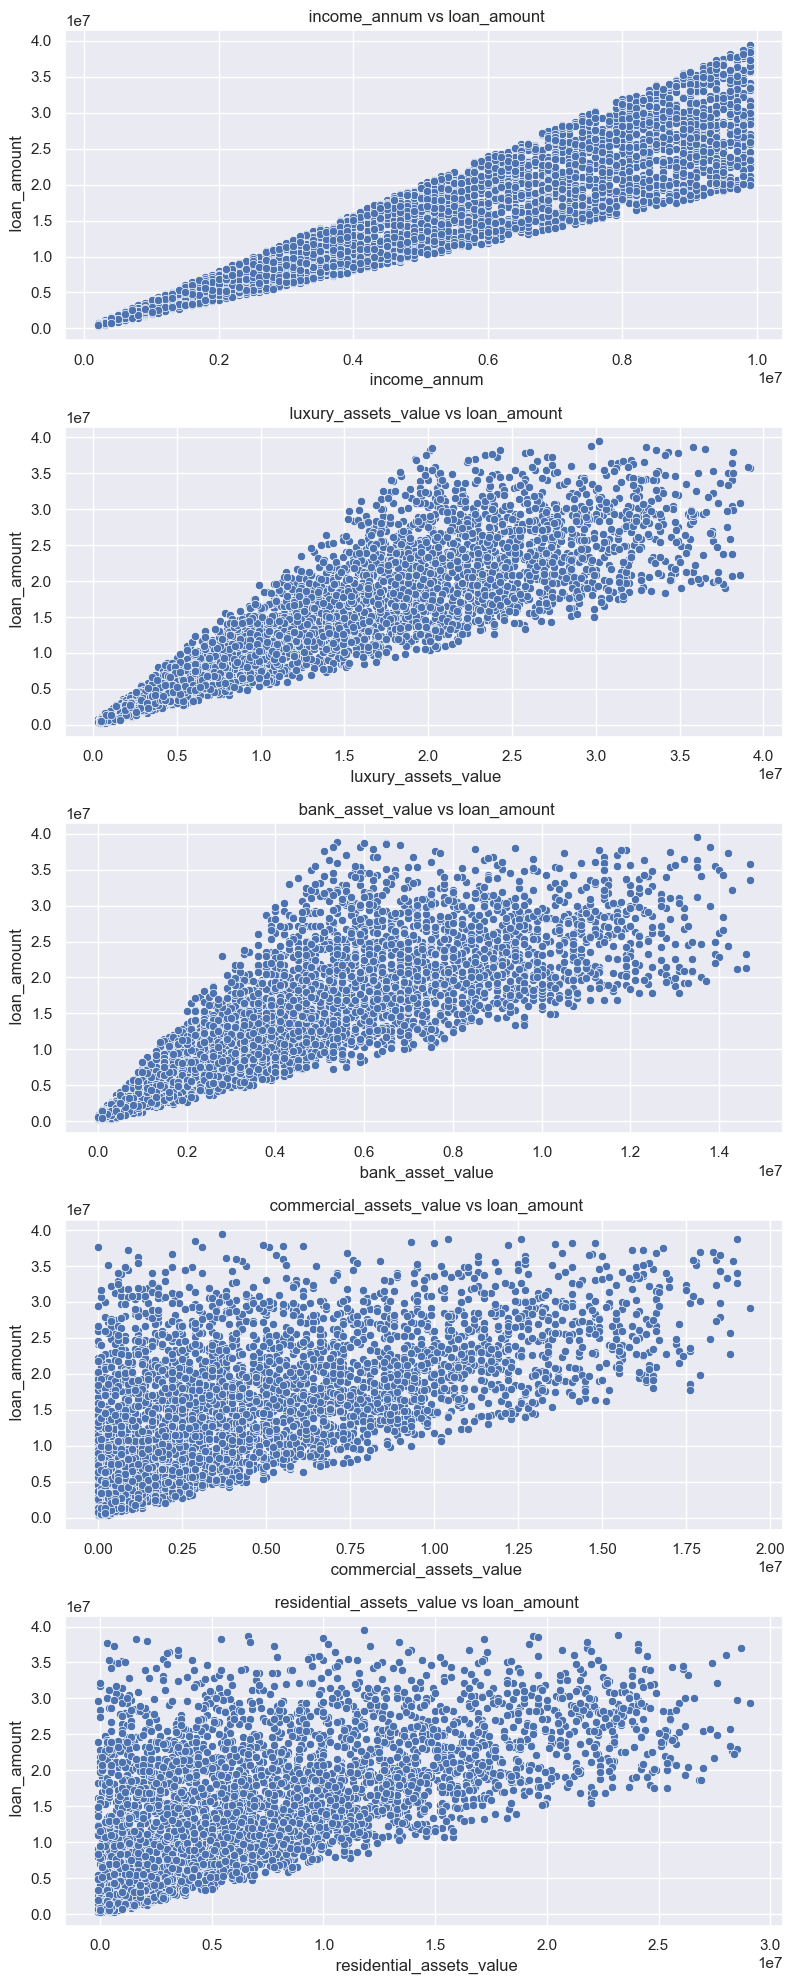

In [128]:
#initialise a list to store the variables
x_variables = [' income_annum',' luxury_assets_value',' bank_asset_value',' commercial_assets_value',' residential_assets_value']
# Generate scatterplots
fig, axs = plt.subplots(len(x_variables), 1, figsize=(8, len(x_variables) * 4))
for i, x in enumerate(x_variables):
    sb.scatterplot(data=dataset, x=x, y=' loan_amount', ax=axs[i])
    axs[i].set_title(f"{x} vs loan_amount")
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(' loan_amount')

# Adjust layout
plt.tight_layout()
plt.show()

### As seen from the scatterplot, income_annum,bank_asset_value and luxury_assets_value is more correlated with lesser variance compared to the other variables. Hence they will be used for linear regression model later

#### Now we expand on the correlation of loan status against:
* cibil_score
* loan_term
### Using a box plot and swarm diagram

Text(0.5, 1.0, 'loan_status vs loan_term')

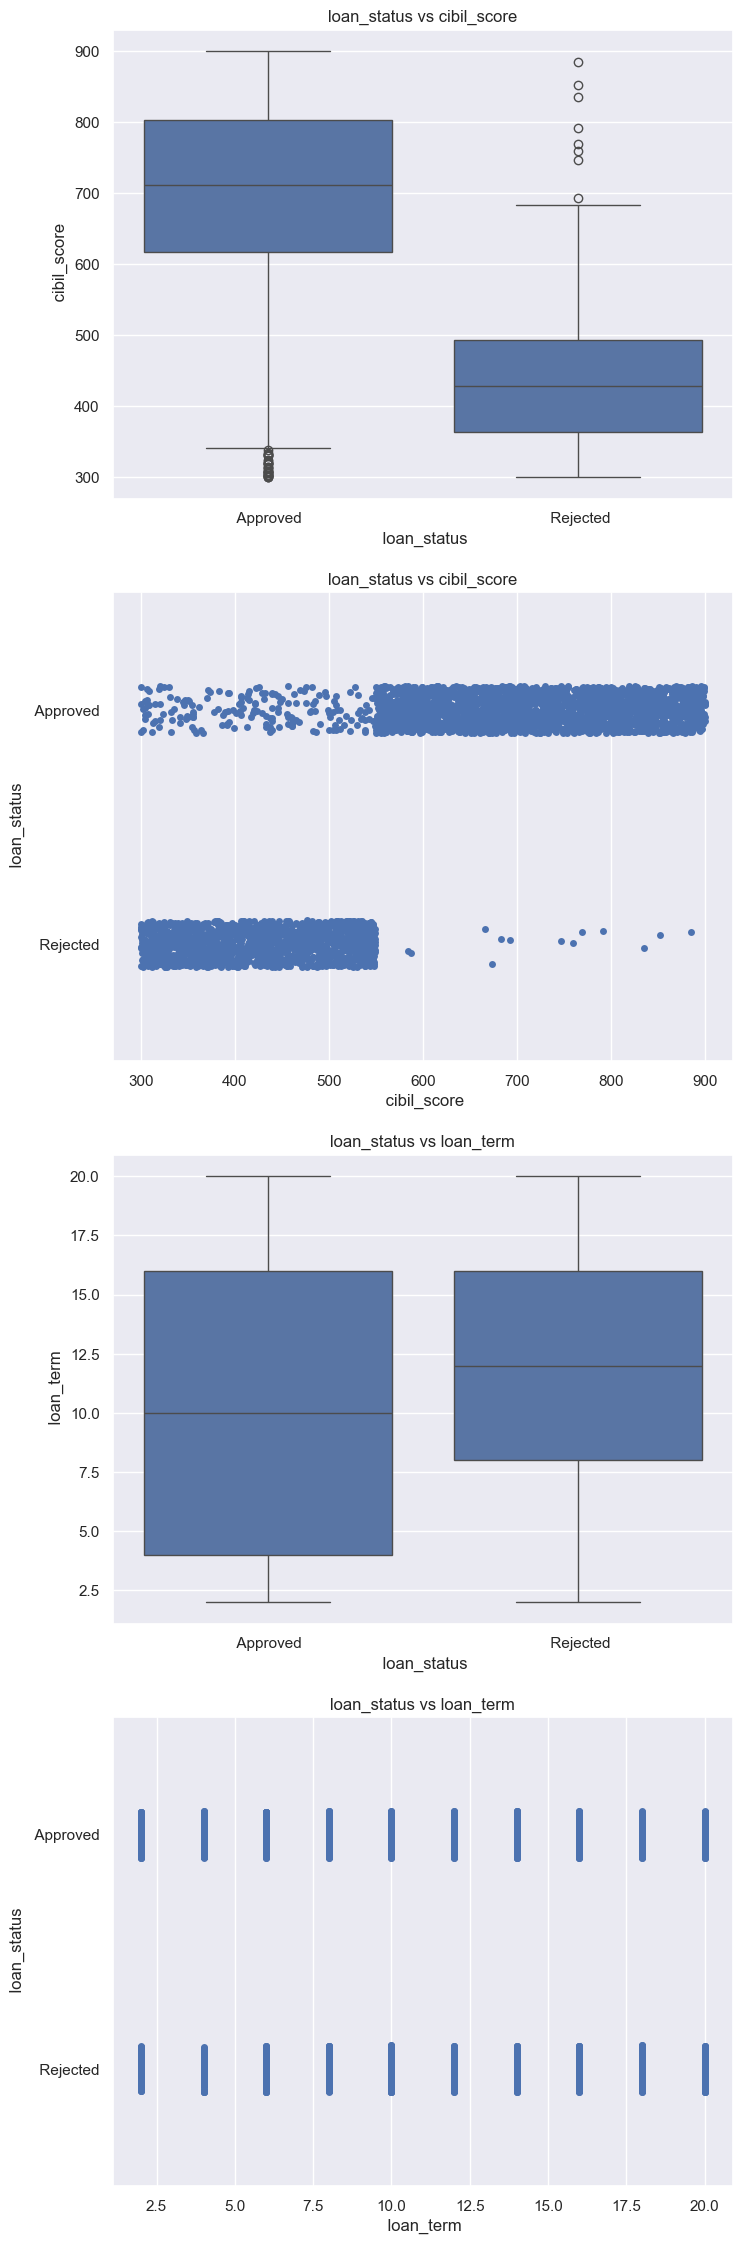

In [129]:
fig, axs = plt.subplots(4, 1, figsize=(8, 4 * 7))

sb.boxplot(data=dataset,x=' loan_status',y=' cibil_score',ax=axs[0])
sb.stripplot(x = " cibil_score", y = " loan_status", data = dataset,ax=axs[1])
axs[0].set_title("loan_status vs cibil_score")
axs[1].set_title("loan_status vs cibil_score")
sb.boxplot(data=dataset,x=' loan_status',y=' loan_term',ax=axs[2])
sb.stripplot(x = " loan_term", y = " loan_status", data = dataset,ax=axs[3])
axs[2].set_title("loan_status vs loan_term")
axs[3].set_title("loan_status vs loan_term")


#### As seen on the diagram, cibil_score has a very high correlation with loan_status, seeing a pattern of higher chance of approval with higher cibil_score while loan_term does not show clear correlation. cibil_score will be used as a main variable for predicting loan approval rate

---
# Machine Learning:

In [130]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [132]:
dataset = pd.read_csv("loan_approval_dataset.csv")


In [133]:
# Create an array of the names of all the variables needed, filtered beforehand
independent_variables = list([' loan_status',' loan_amount',' cibil_score',' income_annum',' luxury_assets_value',' bank_asset_value']) #we keep loan_status in here for future use
dependent_variable = pd.DataFrame(dataset[" loan_status"]) #create a dataframe for only dependent_variable for easy access

# Extracting only numeric data
num_data = list([' loan_amount',' income_annum',' luxury_assets_value',' bank_asset_value',' cibil_score'])

In [134]:
##initialise train and test data
independent_variable_df = pd.DataFrame(dataset[independent_variables])
x_train, x_test, y_train, y_test = train_test_split(independent_variable_df, dependent_variable, test_size= 0.25)

## We start by building decision tree model and logistic regression model to predict the loan approval rate

### Write a function to generate decision trees

In [135]:
def dec_tree_generator(x_train, x_test, y_train, y_test,feature_name):
    
    x_train, x_test, y_train, y_test = pd.DataFrame(x_train[feature_name]), pd.DataFrame(x_test[feature_name]), y_train, y_test

    # Create a decision tree object and train the model
    dec_tree = DecisionTreeClassifier(max_depth=3)
    dec_tree.fit(x_train, y_train)

    # Plot the training tree
    f = plt.figure(figsize= (30, 8))
    plot_tree(dec_tree, feature_names= [feature_name], class_names= ["Approved", "Rejected"], filled=True, rounded = True)


    # On the train set, predict y using x
    y_train_pred = dec_tree.predict(x_train)
    # On the test set, predict y using x
    y_test_pred = dec_tree.predict(x_test)

    print("Train set accuracy: ", dec_tree.score(x_train, y_train))
    print("Test set accuracy: ", dec_tree.score(x_test, y_test))
    print()
    
    # Create new figure
    plt.figure(figsize=(16, 8))

    # Plot 1st subplot in the figure
    plt.subplot(1, 2, 1)
    plt.title("Train Set")
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f") 
    
    #heat map is just to visualize, the data is from confusion matrix
    # Plot 2nd subplot in the figure
    plt.subplot(1, 2, 2)
    plt.title("Test Set")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f") 

    # Print TPR FPR for test and train sets
    cm_train = confusion_matrix(y_train, y_train_pred)

    true_positive_rate = cm_train[1][1]/(cm_train[1][0] + cm_train[1][1])
    print("Train set true positive rate:", true_positive_rate)
    false_positive_rate = cm_train[0][1]/(cm_train[0][1]+cm_train[0][0])
    print("Train set false positive rate:", false_positive_rate)
    print("")

    cm_test = confusion_matrix(y_test, y_test_pred)

    true_positive_rate = cm_test[1][1]/(cm_test[1][0] + cm_test[1][1])
    print("Test set true positive rate:", true_positive_rate)
    false_positive_rate = cm_test[0][1]/(cm_test[0][1]+cm_test[0][0])
    print("Test set false positive rate:", false_positive_rate)

    return dec_tree


#### Uni-variate decision tree using only the credit score (cibil_score)

Train set accuracy:  0.9531396438612934
Test set accuracy:  0.9550561797752809

Train set true positive rate: 0.9916387959866221
Train set false positive rate: 0.06982543640897755

Test set true positive rate: 0.9928057553956835
Test set false positive rate: 0.06912442396313365


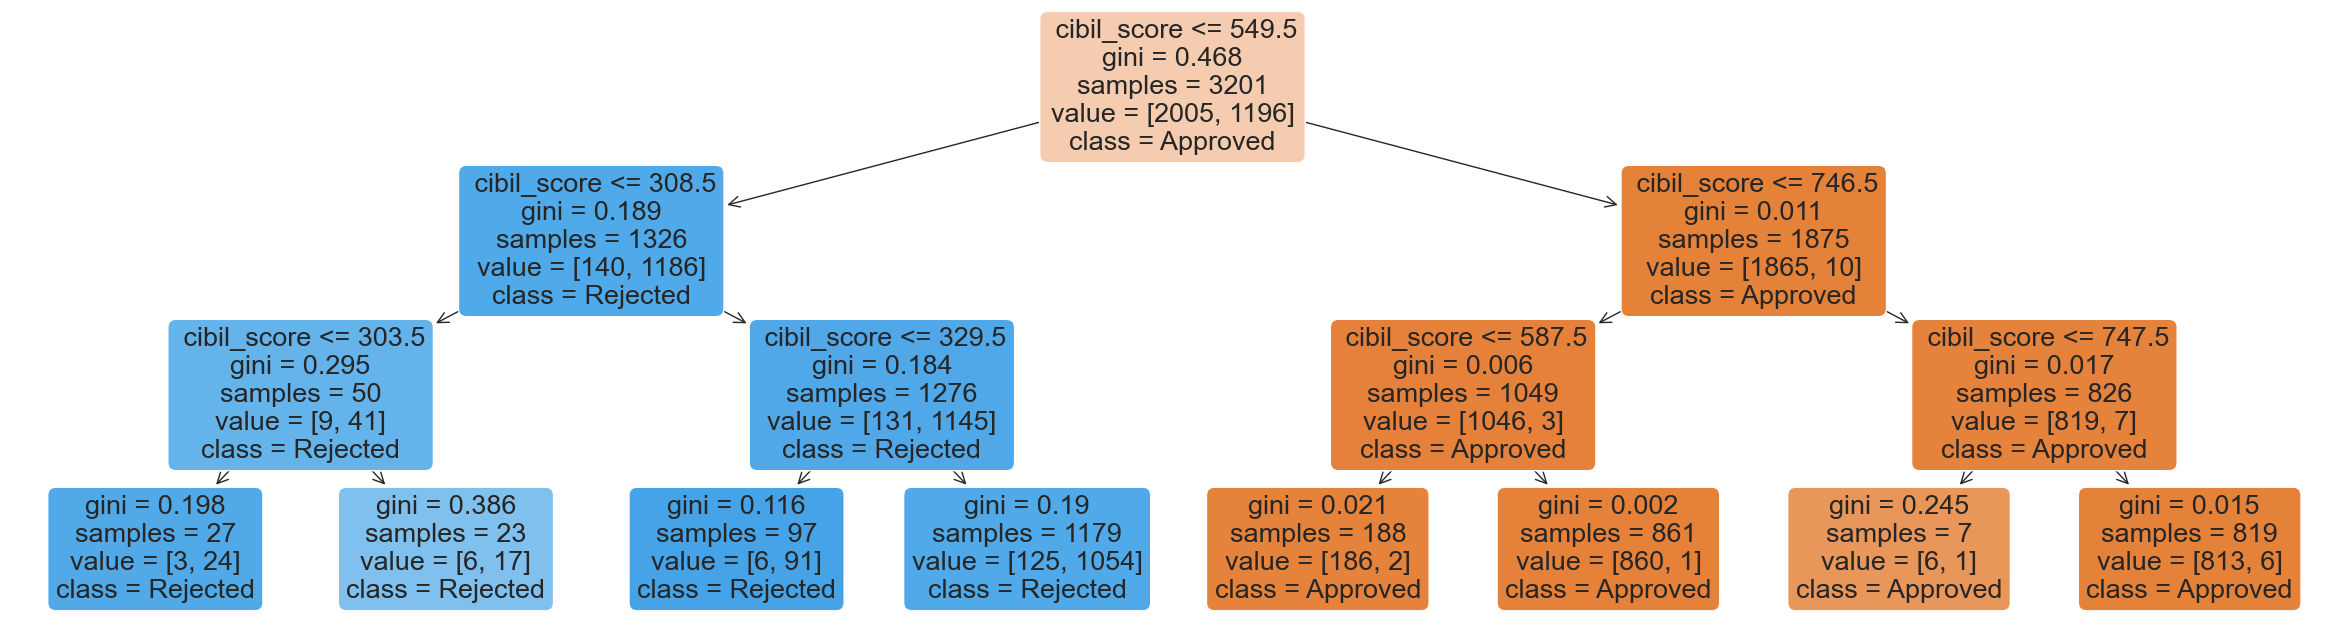

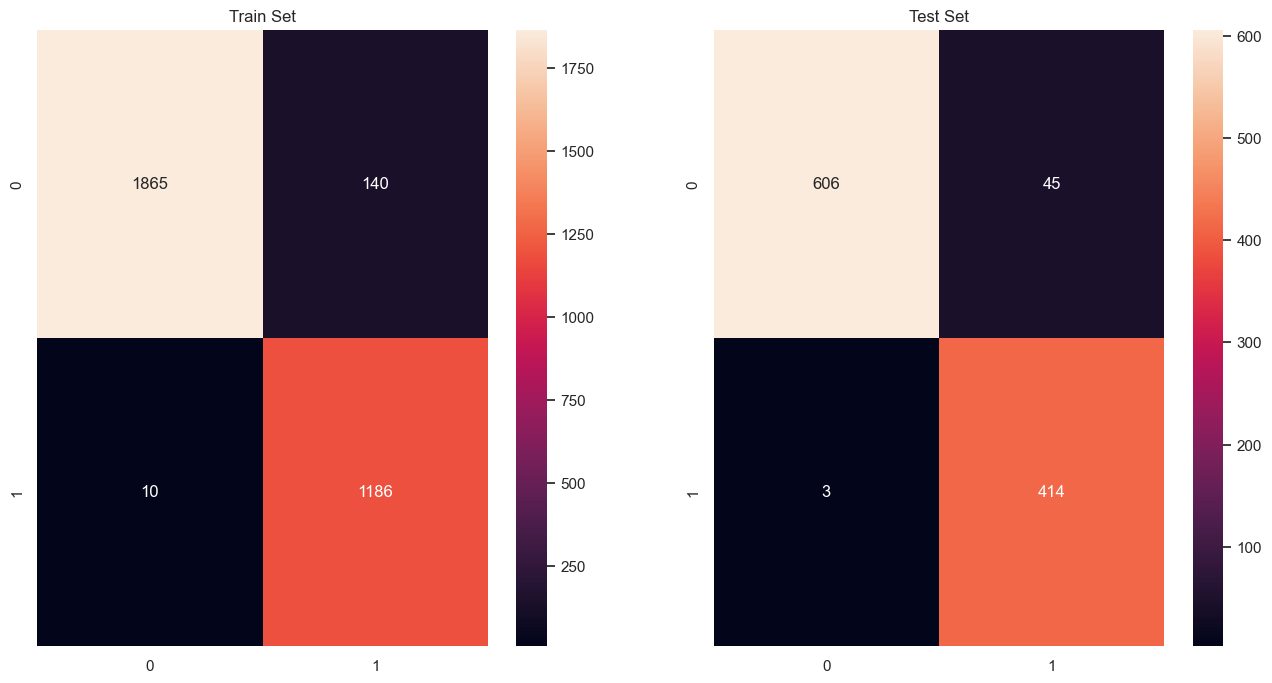

In [136]:
credit_score_dec_tree = dec_tree_generator(x_train, x_test, y_train, y_test," cibil_score")

#### Generate a multi-variate decision tree using all the numeric datas to see if there will be any improvements in our accuracy

In [137]:
# Create a multivariate decision tree
def multivarTree(x_train,x_test,y_train,y_test,feature_name):

    x_train, x_test, y_train, y_test = pd.DataFrame(x_train[feature_name]),pd.DataFrame(x_test[feature_name]),y_train,y_test

    # Create a decision tree object and train the model
    dec_tree = DecisionTreeClassifier(max_depth=3)
    dec_tree.fit(x_train, y_train)

    # Plot the training tree
    f = plt.figure(figsize= (30, 8))
    plot_tree(dec_tree, feature_names= x_train.columns, class_names= ["Approved", "Rejected"], filled=True, rounded = True)


    # On the train set, predict y using x
    y_train_pred = dec_tree.predict(x_train)
    # On the test set, predict y using x
    y_test_pred = dec_tree.predict(x_test)

    print("Train set accuracy: ", dec_tree.score(x_train, y_train))
    print("Test set accuracy: ", dec_tree.score(x_test, y_test))
    print()

    # Create new figure
    plt.figure(figsize=(16, 8))

    # Plot 1st subplot in the figure
    plt.subplot(1, 2, 1)
    plt.title("Train Set")
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f") 

    #heat map is just to visualize, the data is from confusion matrix
    # Plot 2nd subplot in the figure
    plt.subplot(1, 2, 2)
    plt.title("Test Set")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f") 

    # Print TPR FPR for test and train sets
    cm_train = confusion_matrix(y_train, y_train_pred)

    true_positive_rate = cm_train[1][1]/(cm_train[1][0] + cm_train[1][1])
    print("Train set true positive rate:", true_positive_rate)
    false_positive_rate = cm_train[0][1]/(cm_train[0][1]+cm_train[0][0])
    print("Train set false positive rate:", false_positive_rate)
    print("")

    cm_test = confusion_matrix(y_test, y_test_pred)

    true_positive_rate = cm_test[1][1]/(cm_test[1][0] + cm_test[1][1])
    print("Test set true positive rate:", true_positive_rate)
    false_positive_rate = cm_test[0][1]/(cm_test[0][1]+cm_test[0][0])
    print("Test set false positive rate:", false_positive_rate)

    return dec_tree

Train set accuracy:  0.9537644486098095
Test set accuracy:  0.9531835205992509

Train set true positive rate: 0.9916387959866221
Train set false positive rate: 0.0688279301745636

Test set true positive rate: 0.988009592326139
Test set false positive rate: 0.06912442396313365


DecisionTreeClassifier(max_depth=3)

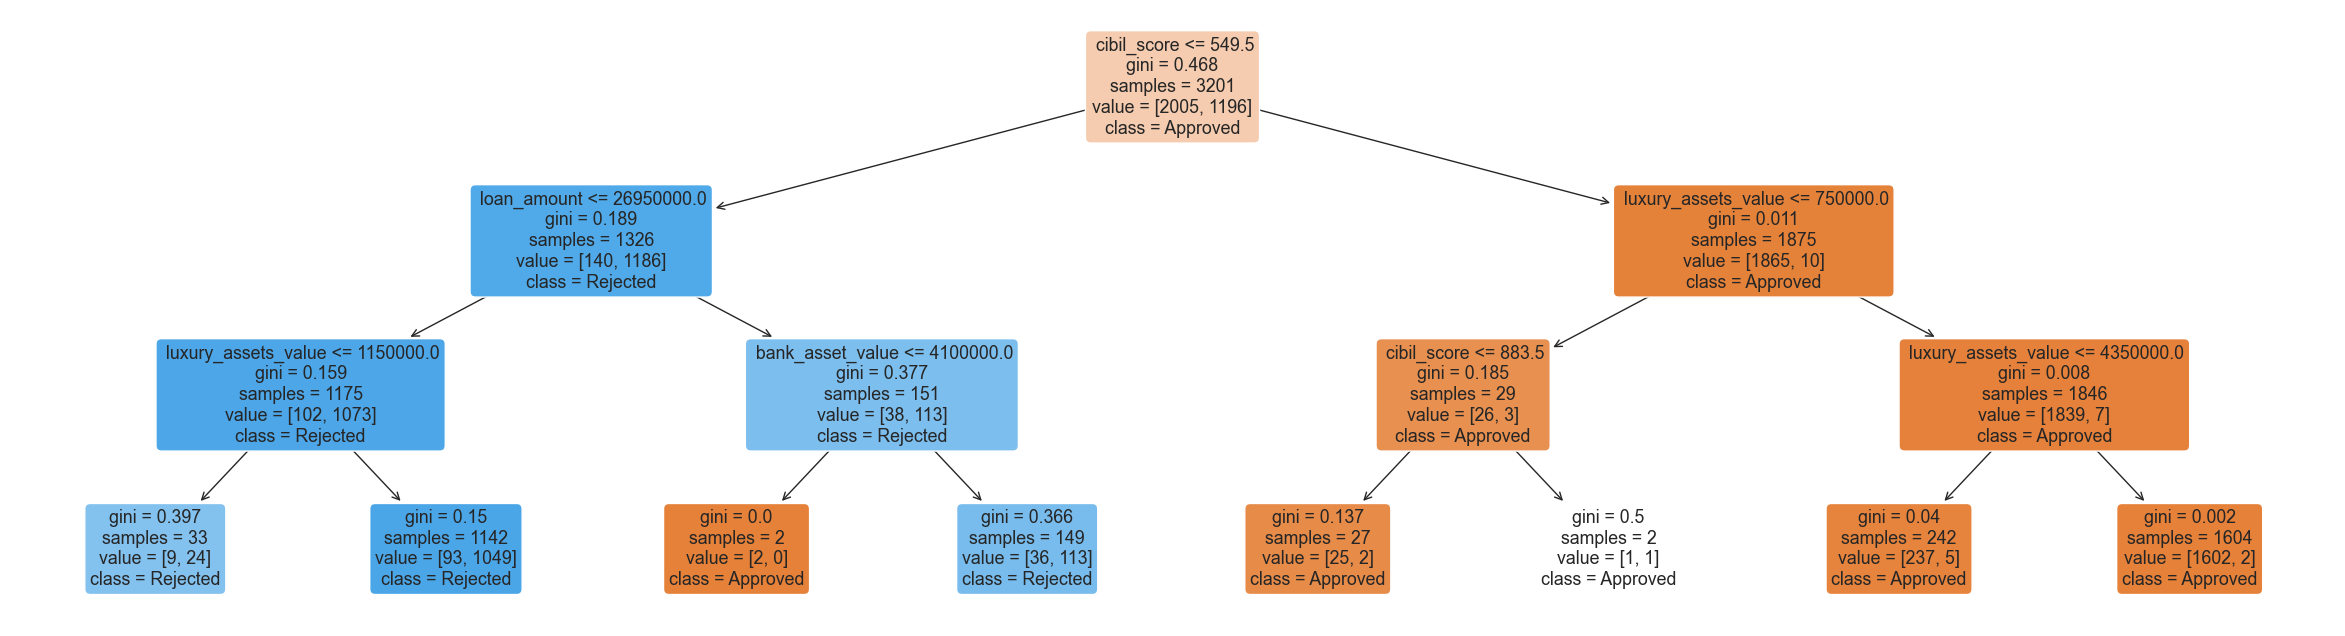

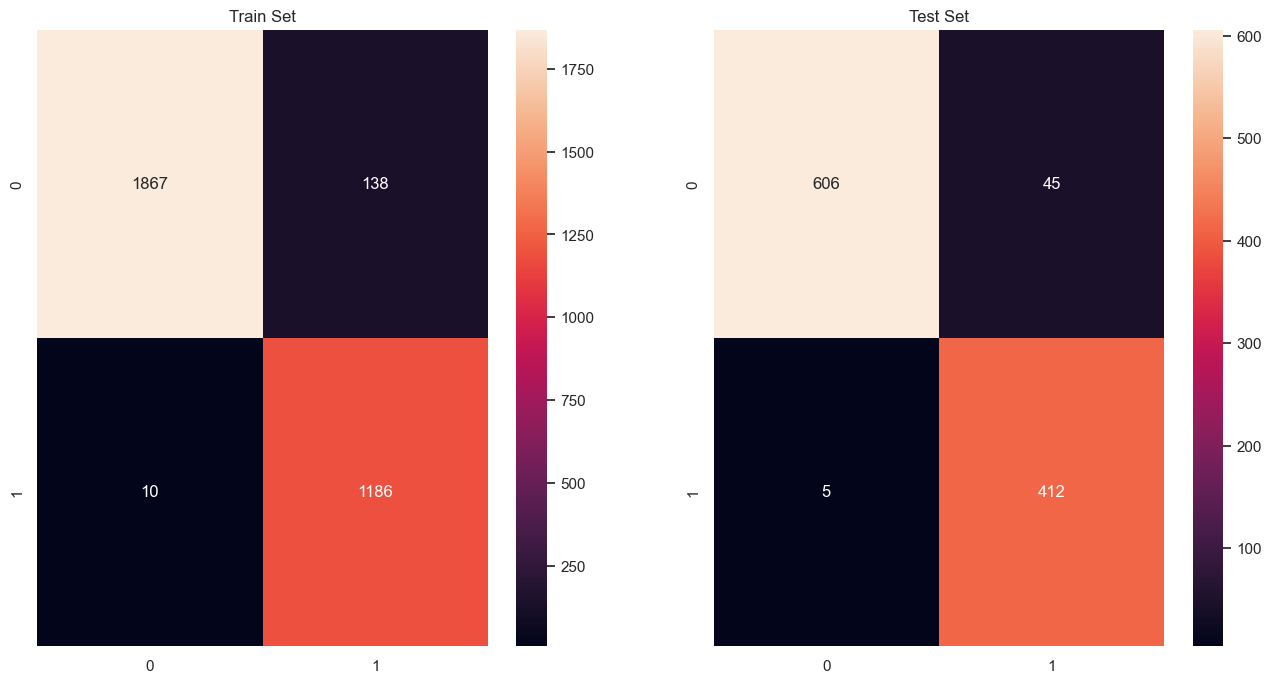

In [138]:
multivarTree(x_train,x_test,y_train,y_test,num_data)

#### By comparing the accuracy of both decision trees, we can see that there are no improvements in the prediction accuracy in the multi_variate decision tree compared to the uni-variate decision tree. Hence, we will mainly focus on the use of the cibil_score uni-variate decision tree

## Write a function to generate logistic regression model

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
def logistic_regression(x_train,x_test,y_train,y_test,feature_name):

    from sklearn import metrics
    from sklearn.metrics import confusion_matrix

    x_train, x_test, y_train, y_test = pd.DataFrame(x_train[feature_name]),pd.DataFrame(x_test[feature_name]),y_train, y_test
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)

    y_pred = logreg.predict(x_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

    confusion_matrix = confusion_matrix(y_test, y_pred)
    # print(confusion_matrix)

    # Create new figure
    plt.figure(figsize=(16, 8))

    # Plot 1st subplot in the figure
    plt.title("Logistic Regression")
    sb.heatmap(confusion_matrix, annot = True, fmt=".0f") 

    return logreg


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.92


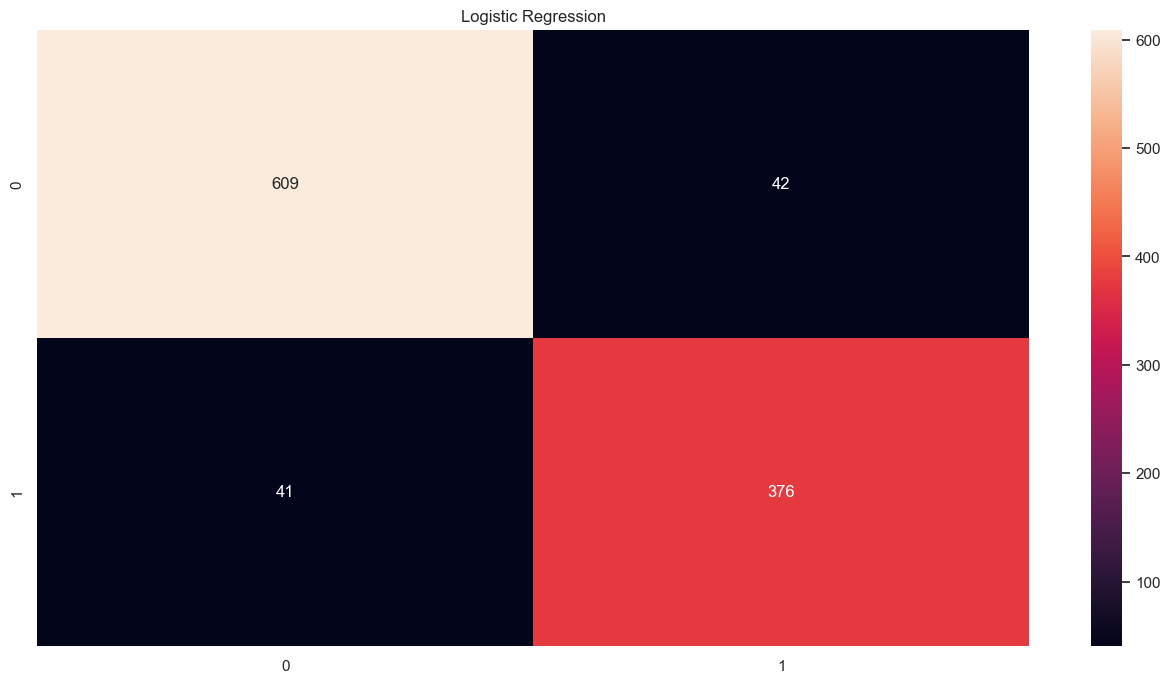

In [141]:
logistic_regression_model = logistic_regression(x_train,x_test,y_train,y_test, " cibil_score")

<Axes: xlabel=' cibil_score', ylabel=' loan_status'>

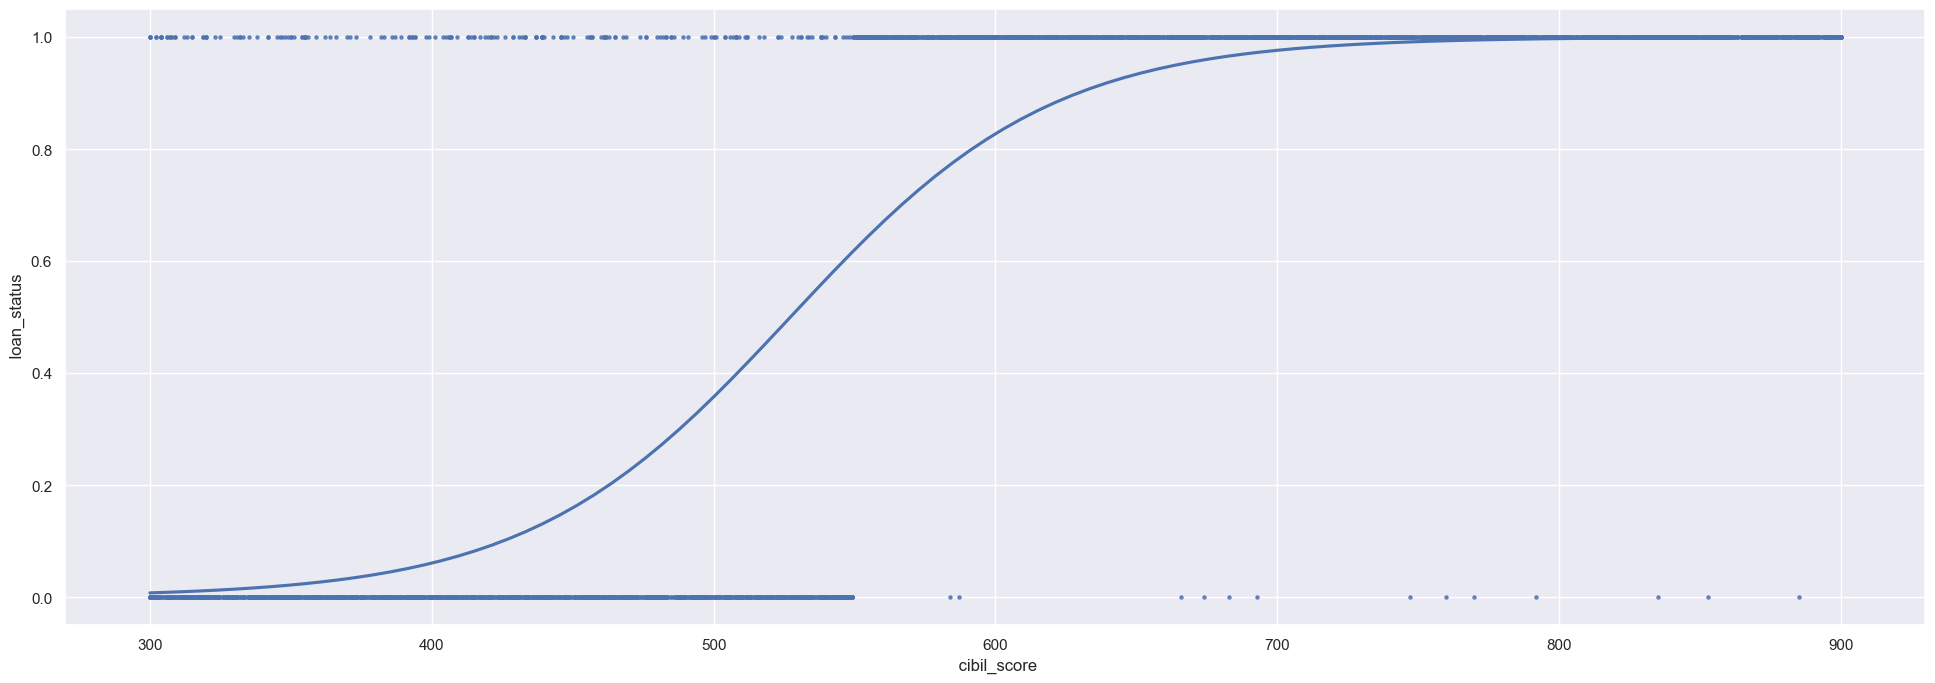

In [142]:
import seaborn as sns
import statsmodels


x = dataset[" cibil_score"]

binary_loan_status_dataset = dataset.copy()
binary_loan_status_dataset[" loan_status"] = dataset[" loan_status"].replace([" Approved", " Rejected"], [1, 0])

y = binary_loan_status_dataset[" loan_status"]

# if you encounter a problem, please install the statsmodels package
plt.figure(figsize= (24, 8),)
sns.regplot(x=x, y=y, data=dataset, logistic=True, ci=None, scatter_kws={'s': 5})

## Building linear regression models to predict loan amount

#### Filter out the rejected datas to increase the reliability of the loan amount provided to user

In [143]:
approved_dataset = dataset[[' loan_amount',' income_annum',' luxury_assets_value',' bank_asset_value', ' loan_status']]
approved_dataset = approved_dataset[approved_dataset[" loan_status"] == " Approved"]

#### Create a linear regression function

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def linear_regression(x, y, x_train, x_test):

    #we are using x_train and x_test for both x and y here because the variables loan_amount and income_annum are both in the x dataframe
    x_train, x_test, y_train, y_test = pd.DataFrame(x_train[x]), pd.DataFrame(x_test[x]), pd.DataFrame(x_train[y]), pd.DataFrame(x_test[y])

    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    y_test_pred = regressor.predict(x_test)
    y_train_pred = regressor.predict(x_train)

    f, ax = plt.subplots(figsize = (16, 10))
    
    # set the x axis intervals
    xinterval = np.arange(0, 11000000, 1000000)
    ax.set_xticks(xinterval)

    plt.scatter(x_train, y_train, s=8) # s is to resize the marker (points)
    plt.plot(x_train, y_train_pred, color = 'k')

    plt.show()

    print("Mean squared error(MSE):", mean_squared_error(y_test, y_test_pred))
    print("Explained Variance on the test dataset is:", regressor.score(x_test, y_test))

    return regressor

#### Draw uni-variate linear regression model for income_annum against loan_amount as income_annum is found to be the most correlated with loan_amount

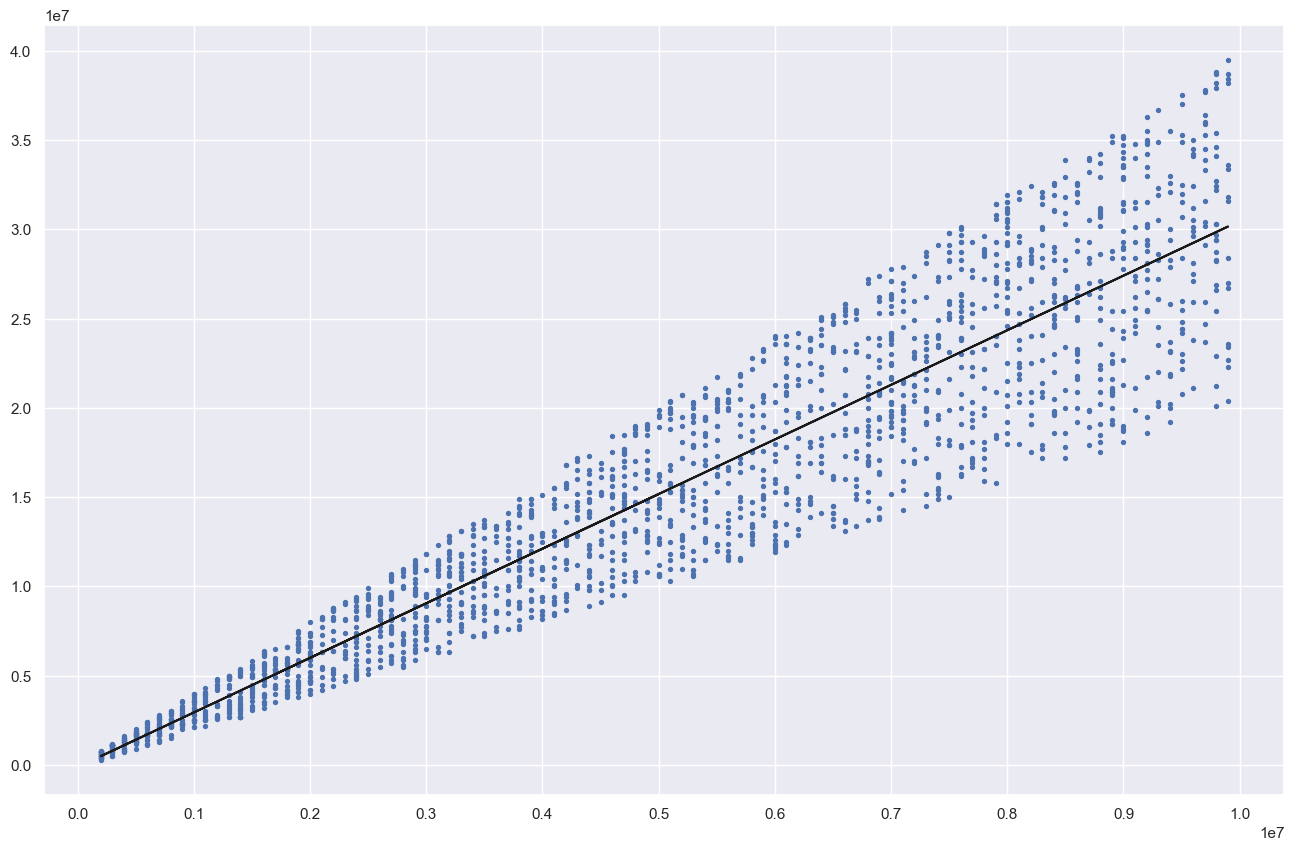

Mean squared error(MSE): 11665958956266.385
Explained Variance on the test dataset is: 0.8589414839594748


In [145]:
#We will now filter x_train and x_test to only approved data
x_train_filtered = x_train[x_train[" loan_status"] == " Approved"]
x_test_filtered = x_test[x_test[" loan_status"] == " Approved"]
linear_regression_model=linear_regression(" income_annum", " loan_amount",x_train_filtered,x_test_filtered)

#### We will now generate multi-variate linear regression models to see if there are any improvements made as compared to uni-variate

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
def linear_regression2(x1, x2, y, train, test):
    # Extracting features and target from training and test datasets
    X_train = train[[x1, x2]]
    y_train = train[y]
    
    X_test = test[[x1, x2]]
    y_test = test[y]
    
    # Initialize and fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plotting the linear regression
    fig = plt.figure(figsize=(15, 20))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X_test[x1], X_test[x2], y_test, c='blue', label='Actual Values')
    ax.scatter(X_test[x1], X_test[x2], y_pred, c='red', label='Predicted Values')
    
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    ax.set_zlabel(y)
    ax.set_title(f"{x1} and {x2} against {y}")
    ax.legend()
    
    plt.show()

    print(f"{x1} and {x2} against {y}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Explained Variance (R^2): {r2}")

#### Seen from the results below, there is no significant improvement in comparison to uni-variate linear regression model against income_annum. Hence we will focus on implementing features above the uni-variate regression

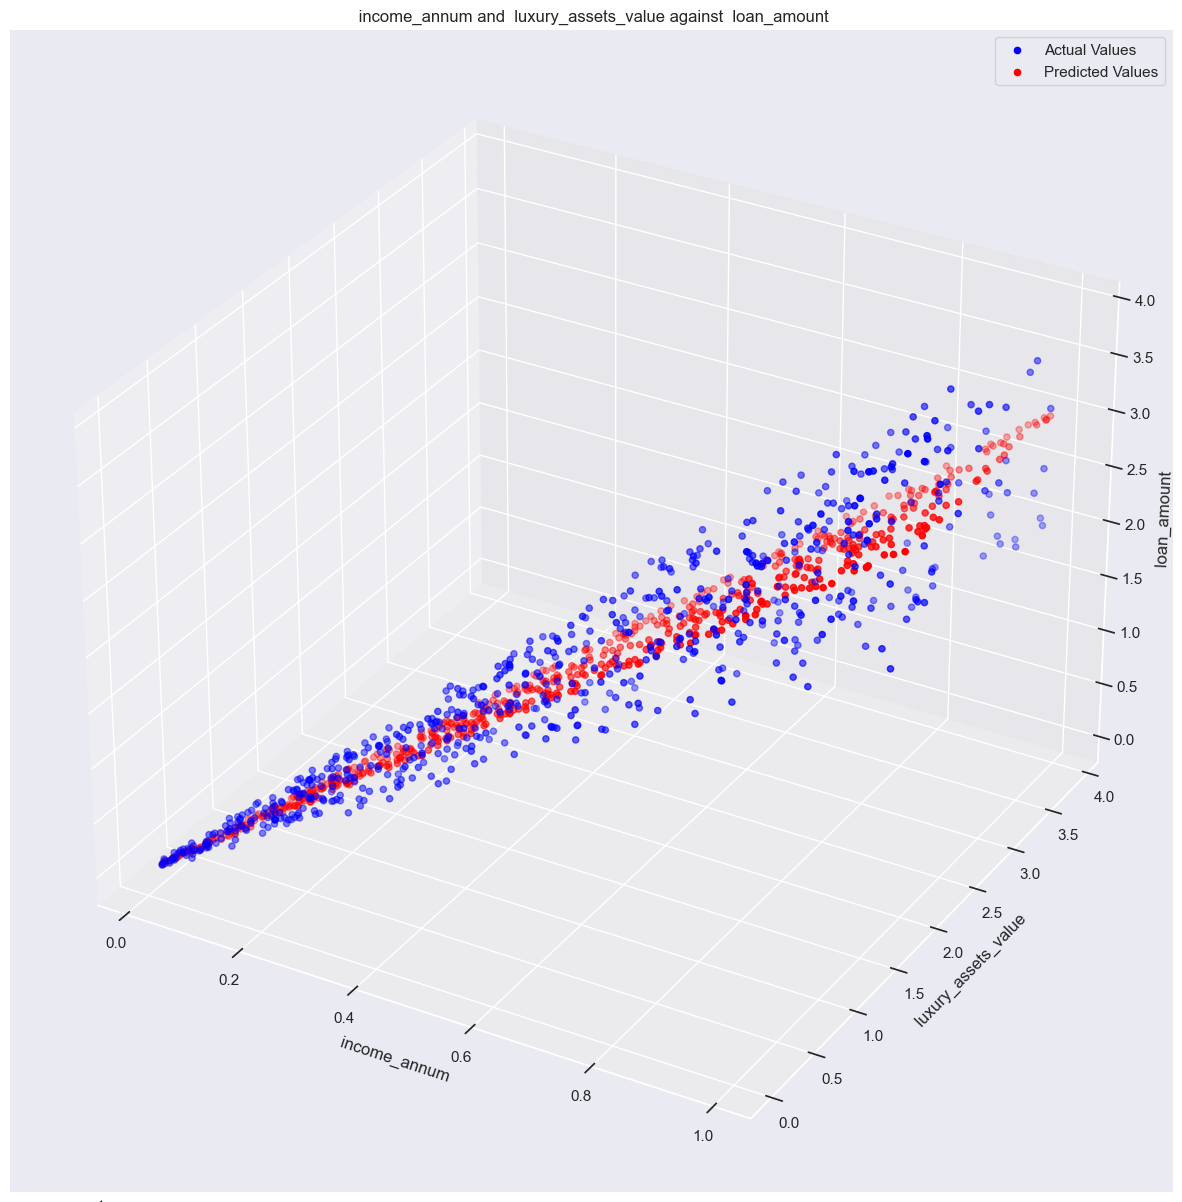

 income_annum and  luxury_assets_value against  loan_amount:
Mean Squared Error (MSE): 11668608843159.533
Explained Variance (R^2): 0.8589094429490252


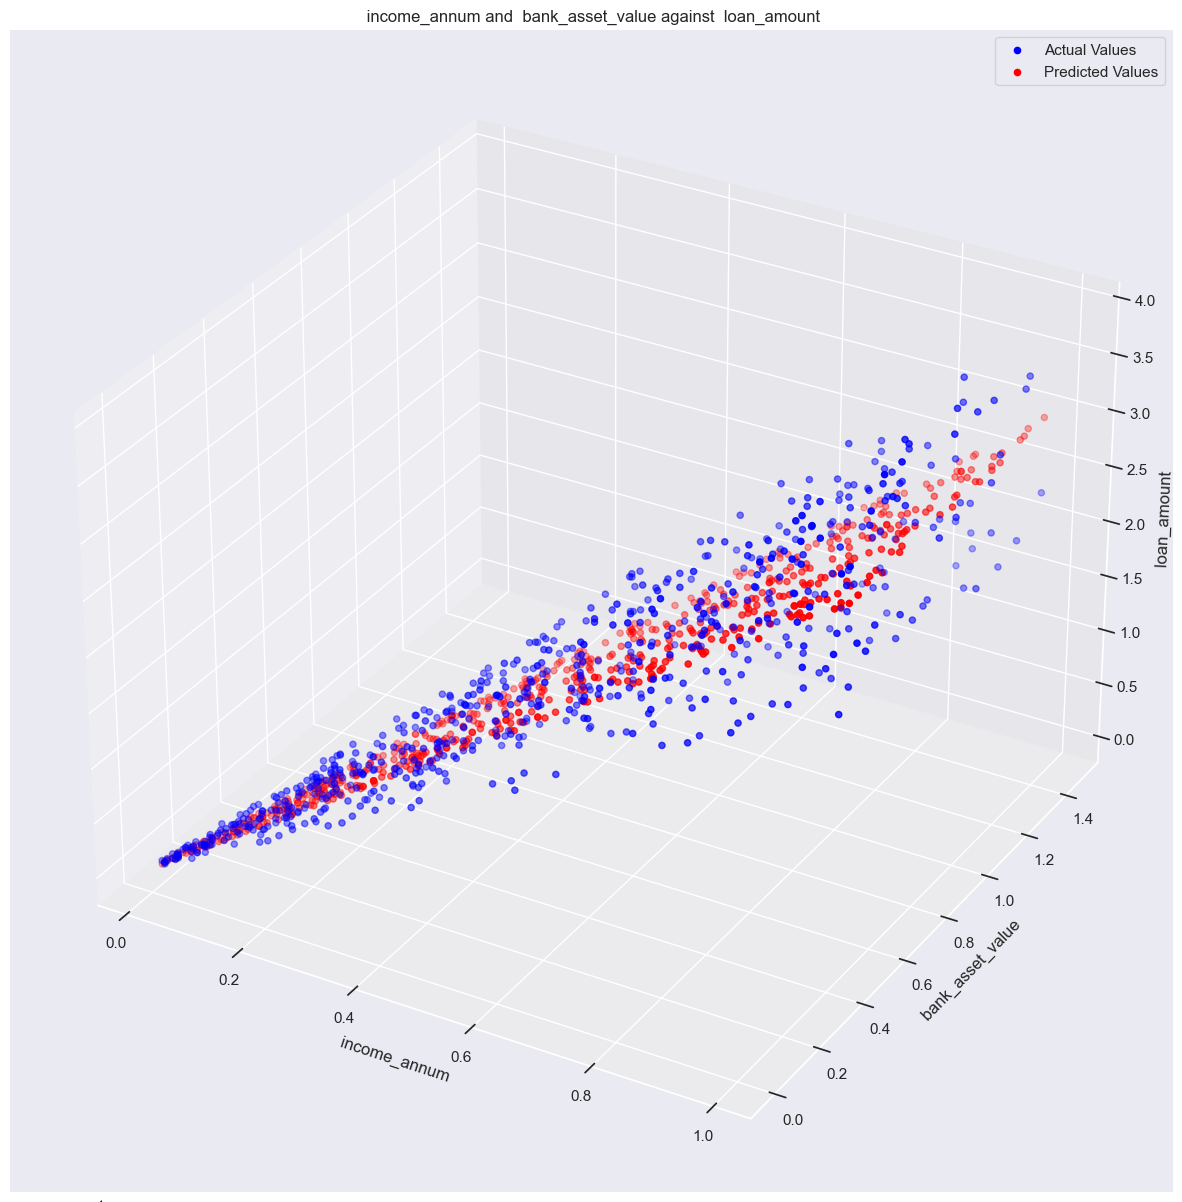

 income_annum and  bank_asset_value against  loan_amount:
Mean Squared Error (MSE): 11659580139332.31
Explained Variance (R^2): 0.8590186131911297


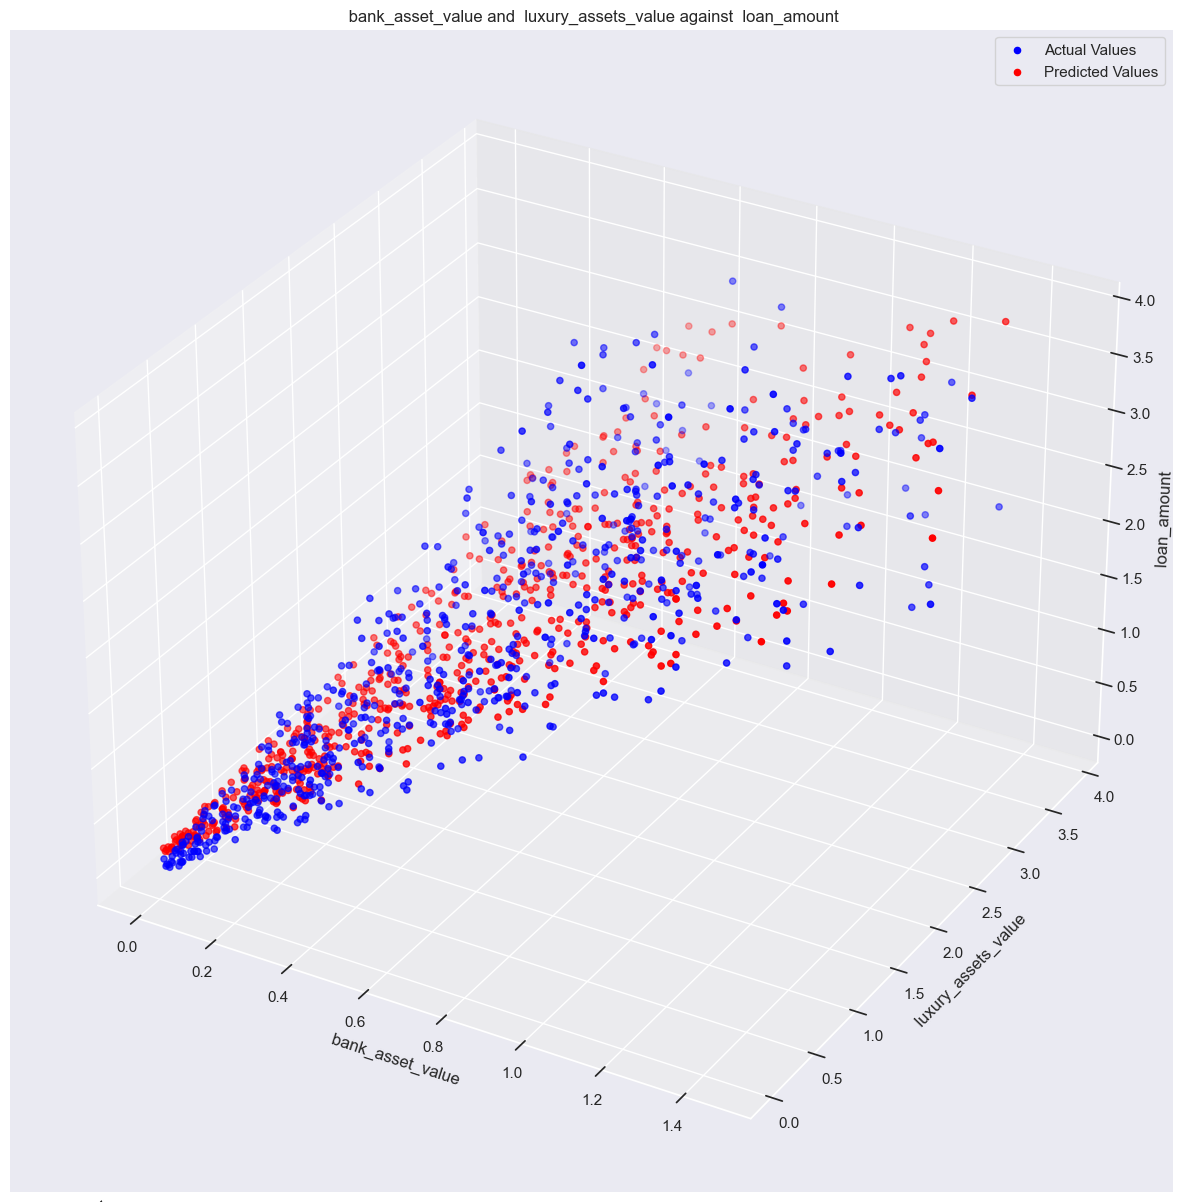

 bank_asset_value and  luxury_assets_value against  loan_amount:
Mean Squared Error (MSE): 18480953412531.926
Explained Variance (R^2): 0.7765382277480466


In [147]:
linear_regression2(' income_annum',' luxury_assets_value',' loan_amount',x_train_filtered,x_test_filtered)
linear_regression2(' income_annum',' bank_asset_value',' loan_amount',x_train_filtered,x_test_filtered)
linear_regression2(' bank_asset_value',' luxury_assets_value',' loan_amount',x_train_filtered,x_test_filtered)

# Taking inputs
## Users can input their credit score and anuual income. The code will then output the range of loan amount that he/she should apply for 

#### Filter the data using the credit score provided by the user. The credit scores are then categorized based on the thresholds in the decision tree. The datas which fit inside the range of the credit score of the user will then be used for prediction, filtering out all the other data.

In [148]:
# rules used to split the decision tree

tree_threshold = credit_score_dec_tree.tree_.threshold
credit_score = int(input("Enter credit score: "))

# Retrieve the index of the leaf that the user's credit score ended up in
leaf_index = credit_score_dec_tree.apply([[credit_score]])
print(leaf_index)
tree_threshold


[10]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([549.5, 308.5, 303.5,  -2. ,  -2. , 329.5,  -2. ,  -2. , 746.5,
       587.5,  -2. ,  -2. , 747.5,  -2. ,  -2. ])

#### Find the range where the user's credit score lies

In [149]:
EXTREME_HIGH_VALUE = 99999999999
EXTREME_LOW_VALUE = 0

# the final rule in the tree was to the left
if tree_threshold[leaf_index - 1] != -2:

    # if is at the right branch of the tree
    if tree_threshold[leaf_index - 2] == -2:

        upper = max(tree_threshold[leaf_index - 1], tree_threshold[leaf_index - 5])
        lower = min(tree_threshold[leaf_index - 1], tree_threshold[leaf_index - 5])            

    #if is at the left branch of the tree, i.e. it is the most left node
    else:
        upper = tree_threshold[leaf_index - 1]
        lower = EXTREME_LOW_VALUE

# the final rule in the tree was to the right (every index just + 1 because it's from the right, need to skip the left node)
if tree_threshold[leaf_index - 1] == -2:

    # if is at the right branch of the tree, i.e. it is the most right node
    if tree_threshold[leaf_index - 3] == -2:
        lower = tree_threshold[leaf_index - 2]
        upper = EXTREME_HIGH_VALUE

    else:
        #if is at the left branch of the tree
        upper = max(tree_threshold[leaf_index - 2], tree_threshold[leaf_index - 3])
        lower = min(tree_threshold[leaf_index - 2], tree_threshold[leaf_index - 3])

# convert from array to integer
lower = int(lower)
upper = int(upper)
minimum = dataset[' cibil_score'].min()
if(credit_score < minimum): upper = 0


/var/folders/_2/sy4m7s491c3640tycmrbkpn80000gn/T/ipykernel_14298/3567653969.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper = int(upper)


### Create a new dataset that is specific to the user's credit score

#### Prepare the data

In [150]:
#We will now filter x_train and x_test to only approved data and bounded by credit scores
x_train_filtered = x_train[[" loan_amount", " income_annum", " loan_status", " cibil_score"]]
x_train_filtered = x_train_filtered[(x_train_filtered[" loan_status"] == " Approved") & (x_train_filtered[" cibil_score"] > lower) & (x_train_filtered[" cibil_score"] < upper)]

x_test_filtered = x_test[[" loan_amount", " income_annum", " loan_status", " cibil_score"]]
x_test_filtered = x_test_filtered[(x_test_filtered[" loan_status"] == " Approved") & (x_test_filtered[" cibil_score"] > lower) & (x_test_filtered[" cibil_score"] < upper)]

#approved data will be used in later calculation of mean and standard deviation
approved_dataset = dataset[[" loan_amount", " income_annum", " loan_status", " cibil_score"]]
approved_dataset = approved_dataset[(approved_dataset[" loan_status"] == " Approved") & (approved_dataset[" cibil_score"] > lower) & (approved_dataset[" cibil_score"] < upper)]

#### Create a 2D array to categorize the loan amounts according to intervals of annual income, which will be used to calculate the Mean and Standard Deviation in that region.

In [151]:
import math

def hash(value):
    return int(math.floor(value/500000.0))

In [152]:
loan_amount_interval = [[] for i in range(20)]

for i in range(len(approved_dataset)):

    loan_amount = approved_dataset.iloc[i, 0]
    income_annum = approved_dataset.iloc[i, 1]

    index = hash(income_annum)

    loan_amount_interval[index].append(loan_amount)

#### Take in user income, compute the mean and standard deviation according to their income range

In [153]:
input_income = int(input("Enter your annual income: "))

In [154]:
def basic_stats(income):
    
    index = hash(income)

    mean = np.mean(loan_amount_interval[index])

    standard_deviation = np.std(loan_amount_interval[index])

    print("Mean:", mean)
    print("Standard deviation:", standard_deviation)

    return mean, standard_deviation, index
    

In [155]:
mean, standard_deviation, index = basic_stats(input_income)

Mean: 10147826.086956521
Standard deviation: 1517397.533312243


### Draw 2 rectangles that simulate a red box which indicates the income range, the mean, mean+SD and mean-SD

In [156]:
from matplotlib.patches import Rectangle

In [157]:
def linear_regression_pro(x,y,x_train,x_test):

    #we are using x_train and x_test for both x and y here because the variables loan_amount and income_annum are both in the x dataframe
    x_train, x_test, y_train, y_test = pd.DataFrame(x_train[x]), pd.DataFrame(x_test[x]), pd.DataFrame(x_train[y]), pd.DataFrame(x_test[y])

    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    y_test_pred = regressor.predict(x_test)
    y_train_pred = regressor.predict(x_train)

    f, ax = plt.subplots(figsize = (16, 10))
    
    # set the x axis intervals
    xinterval = np.arange(0, 11000000, 1000000)
    ax.set_xticks(xinterval)

    # vertical line to simulate box plot
    # plt.axvline(x = index*1000000, ymin = 1 - (mean - standard_deviation)/100000000, ymax = 1 - (mean + standard_deviation)/100000000, color = 'r')

    # draw a rectangle
    ax.add_patch(Rectangle(((index)*500000, mean - standard_deviation), 500000, 2*standard_deviation, facecolor = "None", edgecolor = 'red'))
    ax.add_patch(Rectangle(((index)*500000, mean - standard_deviation), 500000, standard_deviation, facecolor = "None", edgecolor = 'red')) # to draw the mean line

    print("Mean:", mean)
    print("Upper bound:", mean + standard_deviation)
    print("Lower bound:", mean - standard_deviation)

    plt.scatter(x_train, y_train, s=8) # s is to resize the marker (points)
    plt.plot(x_train, y_train_pred, color = 'k')

    print("Mean squared error(MSE):", mean_squared_error(y_test, y_test_pred))
    print("Explained Variance on the test dataset is:", regressor.score(x_test, y_test))

    return regressor

#### This linear regression model is build based on the data within the credit score range calculated using the user's credit score

Mean: 10147826.086956521
Upper bound: 11665223.620268764
Lower bound: 8630428.553644279
Mean squared error(MSE): 7465056888771.361
Explained Variance on the test dataset is: 0.9083011666363815


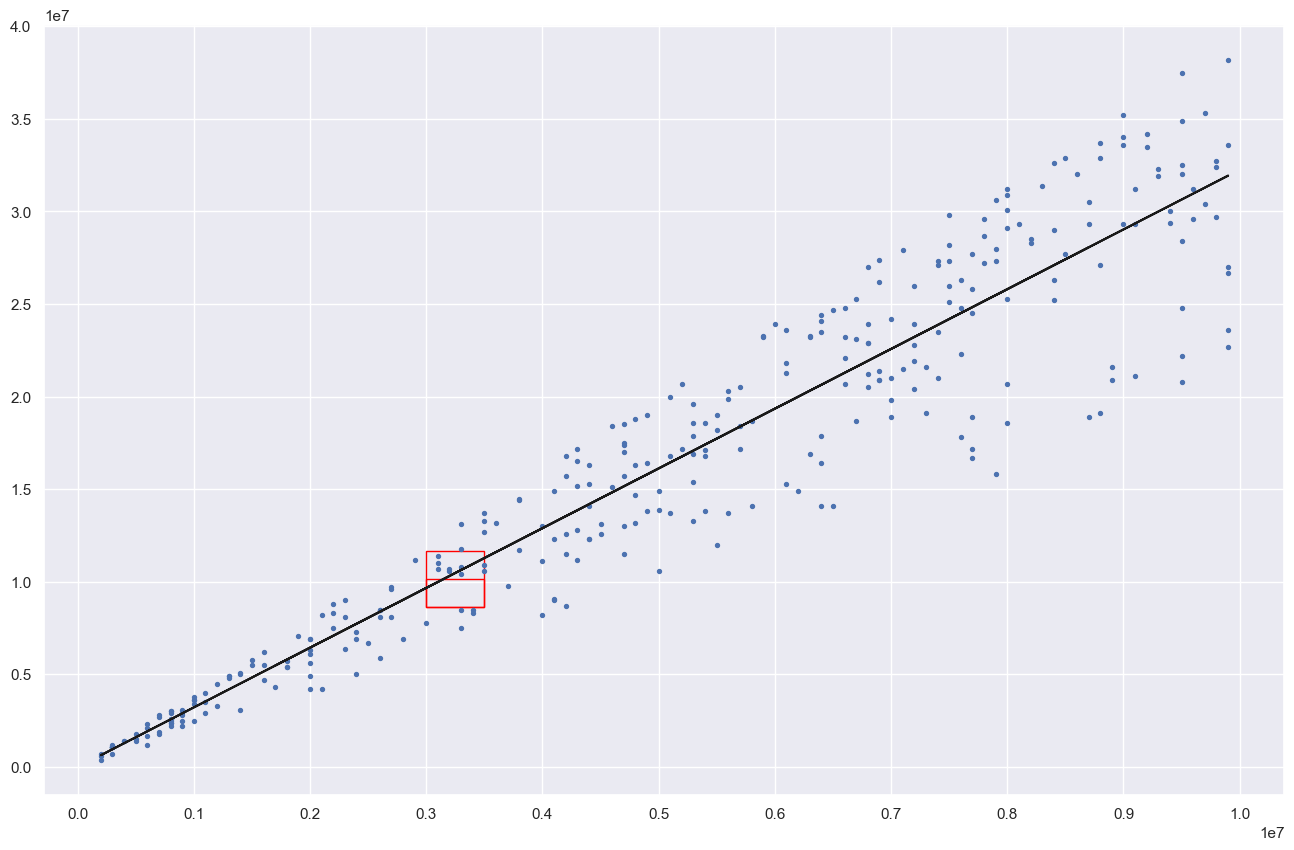

In [158]:
try:
    linear_regression_pro_model=linear_regression_pro(" income_annum", " loan_amount",x_train_filtered,x_test_filtered)
except ValueError:
    print("There are no data available for the credit score given")

## Outputs for the user:

In [159]:
#Loan status processed by decision tree
loan_stat_dtree= credit_score_dec_tree.predict([[credit_score]])

#loan status and probability processed by logistic regression
loan_stat_logreg= logistic_regression_model.predict([[credit_score]])
predicted_probability = logistic_regression_model.predict_proba([[credit_score]])
predicted_probability = max(predicted_probability[0][0], predicted_probability[0][1])
predicted_probability = round(predicted_probability * 100,2)

#loan amount predicted by linear regression model
linear_reg_pred = float(linear_regression_model.predict([[input_income]]))

#loan amount predicted by linear regression after filter by credit score range
try:
    linear_reg_pred_pro = float(linear_regression_pro_model.predict([[input_income]])) #need to try except
except ValueError:
    linear_reg_pred_pro = -1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/_2/sy4m7s491c3640tycmrbkpn80000gn/T/ipykernel_14298/928082670.py:11: DeprecationWarning: Conversion o

In [161]:
print("According to the information you provided as followed: ")
print("Credit Score = ", credit_score)
print("Annual Income = $",input_income)
print()
print("We provide the following analysis: ")
print()

#print the loan approval prediction
print("Your loan approval prediction according to Decision Tree Model is:",loan_stat_dtree[0])
print("The probability of your loan being" + loan_stat_logreg[0], "is", predicted_probability,"% according to Logistic Regression Model")
print()

#print the loan amount prediction using linear regression model
print("Your recommended loan amount by Linear Regression Model is:\t $",round(linear_reg_pred,2))
if(linear_reg_pred_pro !=-1): print("After filtering by your credit score range:                \t $",round(linear_reg_pred_pro,2))
print()


#below are extra information provided
if(np.isnan(mean) == True): print("We are not able to find any case of approval with the provided credit score and annual income")
else:
    print("Most of the loans that are approved in your income range as well as your credit score range lie in the range: $", round(mean-standard_deviation,2), '- $', round(mean+standard_deviation,2))
    print("Mean + Standard Deviation                    \t $", round(mean + standard_deviation,2))
    print("The average(mean) of the loan you can take is\t $", round(mean,2)) 
    print("Mean - Standard Deviation                    \t $", round(mean - standard_deviation,2))
print()

According to the information you provided as followed: 
Credit Score =  580
Annual Income = $ 3000000

We provide the following analysis: 

Your loan approval prediction according to Decision Tree Model is:  Approved
The probability of your loan being Approved is 75.56 % according to Logistic Regression Model

Your recommended loan amount by Linear Regression Model is:	 $ 9055582.09
After filtering by your credit score range:                	 $ 9671891.07

Most of the loans that are approved in your income range as well as your credit score range lie in the range: $ 8630428.55 - $ 11665223.62
Mean + Standard Deviation                    	 $ 11665223.62
The average(mean) of the loan you can take is	 $ 10147826.09
Mean - Standard Deviation                    	 $ 8630428.55

